In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from pymystem3 import Mystem 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Тестовое задание. Классификация моделей авто.

# Анализ данных 

 ## Загрузка данных

In [2]:
df = pd.read_csv('auto.csv', sep = ',', na_values=' ')
pd.options.display.max_columns = None

Напишем функцию для открытия и просмотра данных:

In [3]:
def intro(x):
    """
    принимает: x - датасет
       выдаёт: общую информацию, первые пять строк и последние пять строк таблицы, 
               описание данных и количество дубликатов.
             
     описание: Функция дает первичную информацию о данных в датасете.
    """
    print('\033[1m' + 'Общая информация:')
    print ('\033[0m')
    display(x.info())
    print('\033[1m' + 'Первые пять строк:')
    print ('\033[0m')
    display(x.head())
    print('\033[1m' + 'Последние пять строк:')
    print ('\033[0m')
    display(x.tail())
    print('\033[1m' + 'Описание данных:')
    print ('\033[0m')
    display(x.describe())  
    print('\033[1m' + 'Дубликаты:')
    print ('\033[0m')
    display(x.duplicated().sum())  

Посмотрим на данные:

In [4]:
intro(df)

Общая информация:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1703 entries, 0 to 1702
Data columns (total 21 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   brand                                                 1703 non-null   object
 1   model                                                 1703 non-null   object
 2   complect                                              1703 non-null   object
 3   type_car                                              1703 non-null   object
 4   seats                                                 1703 non-null   int64 
 5   doors                                                 1703 non-null   int64 
 6   Двигатель                                             1703 non-null   object
 7   Мощность                                              1703 non-null   object
 8   Крутящий момент двигателя                        

None

Первые пять строк:



,brand,model,complect,type_car,seats,doors,Двигатель,Мощность,Крутящий момент двигателя,Коробка передач,Привод,Разгон до сотни,Максимальная скорость,Расход топлива (л/100 км)\nгород / трасса / смешанный,Дорожный просвет,Габариты (длина × ширина × высота),Колёсная база,Объём багажника,Объём багажника максимальный,Объём топливного бака,Масса автомобиля
0,Audi,A3 Sedan,1.4 TFSI 7AMT,Седан класса C,5,4,бензиновый (1395 см³),150 л. с.,250 Н·м,роботизированная (7 ступеней),передний,8.2 секунды,224 км/ч,5.9 / 4.1 / 4.8,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1320 кг
1,Audi,A3 Sedan,sport 1.4 TFSI 7AMT,Седан класса C,5,4,бензиновый (1395 см³),150 л. с.,250 Н·м,роботизированная (7 ступеней),передний,8.2 секунды,224 км/ч,5.9 / 4.1 / 4.8,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1320 кг
2,Audi,A3 Sedan,2.0 TFSI 7AMT,Седан класса C,5,4,бензиновый (1984 см³),190 л. с.,320 Н·м,роботизированная (7 ступеней),передний,6.8 секунды,250 км/ч,7.2 / 4.7 / 5.6,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1395 кг
3,Audi,A3 Sedan,2.0 TFSI 7AMT quattro,Седан класса C,5,4,бензиновый (1984 см³),190 л. с.,320 Н·м,роботизированная (7 ступеней),полный,6.2 секунды,242 км/ч,7.2 / 4.8 / 5.7,165 мм,4458 × 1796 × 1416,2637 мм,390 л,845 л,55 л,1465 кг
4,Audi,A3 Sedan,sport 2.0 TFSI 7AMT,Седан класса C,5,4,бензиновый (1984 см³),190 л. с.,320 Н·м,роботизированная (7 ступеней),передний,6.8 секунды,242 км/ч,7.2 / 4.7 / 5.6,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1395 кг


Последние пять строк:



,brand,model,complect,type_car,seats,doors,Двигатель,Мощность,Крутящий момент двигателя,Коробка передач,Привод,Разгон до сотни,Максимальная скорость,Расход топлива (л/100 км)\nгород / трасса / смешанный,Дорожный просвет,Габариты (длина × ширина × высота),Колёсная база,Объём багажника,Объём багажника максимальный,Объём топливного бака,Масса автомобиля
1698,Volvo,XC90,D5 AT 5S R-Design,Большой кроссовер,5,5,дизельный (1969 см³),235 л. с.,480 Н·м,автоматическая (8 ступеней),полный,7.8 секунды,220 км/ч,6.4 / 5.5 / 5.8,237 мм,4950 × 2008 × 1776,2984 мм,721 л,1899 л,71 л,1969 кг
1699,Volvo,XC90,T6 AT 7S R-Design,Большой кроссовер,7,5,бензиновый (1969 см³),320 л. с.,400 Н·м,автоматическая (8 ступеней),полный,6.5 секунды,230 км/ч,0 / 0 / 8.3,237 мм,4950 × 2008 × 1776,2984 мм,692 л,1899 л,71 л,2004 кг
1700,Volvo,XC90,D5 AT 7S R-Design,Большой кроссовер,7,5,дизельный (1969 см³),235 л. с.,480 Н·м,автоматическая (8 ступеней),полный,7.8 секунды,220 км/ч,6.4 / 5.5 / 5.8,237 мм,4950 × 2008 × 1776,2984 мм,692 л,1899 л,71 л,2009 кг
1701,Volvo,XC90,T8 AT 7S Inscription,Большой кроссовер,7,5,гибридный (1969 см³),407 л. с.,640 Н·м,автоматическая (8 ступеней),полный,5.6 секунды,230 км/ч,0 / 0 / 2.1,237 мм,4950 × 2008 × 1776,2984 мм,640 л,1899 л,70 л,2350 кг
1702,Volvo,XC90,T8 AT 7S R-Design,Большой кроссовер,7,5,гибридный (1969 см³),407 л. с.,640 Н·м,автоматическая (8 ступеней),полный,5.6 секунды,230 км/ч,0 / 0 / 2.1,237 мм,4950 × 2008 × 1776,2984 мм,640 л,1899 л,70 л,2350 кг


Описание данных:



,seats,doors
count,1703.000000,1703.000000
mean,5.079272,4.887845
std,0.677096,1.024259
min,1.000000,2.000000
25%,5.000000,4.000000
50%,5.000000,5.000000
75%,5.000000,5.000000
max,9.000000,8.000000


Дубликаты:



0

Напишем функцию что бы посмотреть что находиться в столбцах:

In [5]:
def value_columns(x):
    for i in x.columns:
        print (x[i].value_counts())

In [6]:
#value_columns(df)

## Описание данных

* brand - марка авто;
* model - модель авто;                                                 
* complect - комплектация авто;                                               
* type_car - тип кузова автомобиля;                                             
* doors  - количество дверей;                                                
* Двигатель  - объем двигателя с указанием типа двигателя;                                           
* Мощность - данные мощности двищателя в лошадиных силах;                                              
* Крутящий момент двигателя  - данные в ньютон метрах;                          
* Коробка передач - тип коробки и количество ступеней;
* Привод - полный, передний или задний;
* Разгон до сотни - измерния в секундах;                                       
* Максимальная скорость - измерения в км.ч;
* Расход топлива (л/100 км) город / трасса / смешанный  - три показателя через /; 
* Дорожный просвет - изерения в мм;
* Габариты (длина × ширина × высота) - измерения в мм; 
* Колёсная база - расстояние между центральной частью колес в мм;                                        
* Объём багажника  - измерения в литрах;
* Объём багажника максимальный - объем багажника при сложенных сиденьях,измерния в литрах;                      * Объём топливного бака - измерения в литрах;
* Масса автомобиля - измерения в кг;            

В данных нет пропусков и дубликатов можно продолжить анализ.В данных много столбцов с типом данных object хотя по факту нас там инетресует только числовое значение - исправим это. Можно предположить что для класификации типа кузова нам понадобиться только значение количества седячих мест, количество дверей, объем богажника, дорожный просвет и масса автомобиля, но приведем и все остальные значения в числовой вид и проверим.

## Предобработка данных:

Приведем столбцы к нижнему регистру и выведем списком:

In [7]:
df.columns = df.columns.str.lower()
df.columns

Index(['brand', 'model', 'complect', 'type_car', 'seats', 'doors', 'двигатель',
       'мощность', 'крутящий момент двигателя', 'коробка передач', 'привод',
       'разгон до сотни', 'максимальная скорость',
       'расход топлива (л/100 км)\nгород / трасса / смешанный',
       'дорожный просвет', 'габариты (длина × ширина × высота)',
       'колёсная база', 'объём багажника', 'объём багажника максимальный',
       'объём топливного бака', 'масса автомобиля'],
      dtype='object')

Создадим столбец с типом двигателя:

In [8]:
df['engine_type'] = df['двигатель'].apply(lambda x:re.sub(r'([а-я])( .+)',r'\1',x))

Создадим мтолбец с объемом двигателя: 

In [9]:
df['engine_volume'] = df['двигатель'].apply(lambda x:re.sub(r'\D','',x)).astype('int')

Создадим столбец с мощностью двигателя:

In [10]:
df['engine_power_hp'] = df['мощность'].apply(lambda x:re.sub(r'\D','',x)).astype('int')

Создадим столбец с крутящим моментом: 

In [11]:
df['engine_torque_n.m'] = df['крутящий момент двигателя']\
                            .apply(lambda x:re.sub(r'\D','',x)).astype('int')

Создадим столбец с типом коробки передач:

In [12]:
df['transmission_type'] = df['коробка передач']\
                            .apply(lambda x:re.sub(r'([а-я])( .+)',r'\1',x))

Создадим столбец с количеством ступеней передач:

In [13]:
df['transmission_step'] = df['коробка передач']\
                            .apply(lambda x:re.sub(r'\D','',x)).astype('int')

Разделим расход топлива на город трассу и смешанный на разные столбцы:

In [14]:
df['fc_city'] = df['расход топлива (л/100 км)\nгород / трасса / смешанный']\
                    .apply(lambda x:re.sub(r'([0-9]+)( .+)',r'\1',x)).astype('float')

In [15]:
df['fc_mixed'] = df['расход топлива (л/100 км)\nгород / трасса / смешанный']\
                    .apply(lambda x:re.sub(r'([0-9].+)( .+)',r'\2',x)).astype('float')

In [16]:
df['fc_track']= df['расход топлива (л/100 км)\nгород / трасса / смешанный']\
                    .apply(lambda x:(re.search(r'/([\s\S]+?)/',x).group(1))).astype('float')

Создадим столбец с дорожным просветом:

In [17]:
df['ground_clearance_mm'] = df['дорожный просвет']\
                                .apply(lambda x:re.sub(r'\D','',x)).astype('int')

Разделим столбец с длиной шириной и высотой на три отдельных:

In [18]:
df['length_mm'] = df['габариты (длина × ширина × высота)']\
                    .apply(lambda x:re.sub(r'(\d*)(.+)',r'\1',x)).astype('int')

In [19]:
df['width_mm'] = df['габариты (длина × ширина × высота)']\
                    .apply(lambda x:(re.search(r'×([\s\S]+?)×',x).group(1))).astype('int')

In [20]:
df['height_mm'] = df['габариты (длина × ширина × высота)']\
                    .apply(lambda x:re.sub(r'([0-9].+)( .+)',r'\2',x)).astype('int')

Создадим столбец с колесной базой:

In [21]:
df['wheelbase_mm'] = df['колёсная база']\
                        .apply(lambda x:re.sub(r'\D','',x)).astype('int')

Создадим столбец с объёмом багажника:

In [22]:
df['trunk_volume_l'] = df['объём багажника']\
                        .apply(lambda x:re.sub(r'\D','',x)).astype('int')

Создадим столбец с максимальным объёмом багажника:

In [23]:
df['trunk_volume_max_l'] = df['объём багажника максимальный']\
                            .apply(lambda x:re.sub(r'\D','',x)).astype('int')

Создадим столбец с объёмом топливного бака:

In [24]:
df['ftank_volume_l'] = df['объём топливного бака']\
                        .apply(lambda x:re.sub(r'\D','',x)).astype('int')

Создадим столбец с массой автомобиля:

In [25]:
df['weight_kg'] = df['масса автомобиля']\
                    .apply(lambda x:re.sub(r'\D','',x)).astype('int')

In [26]:
df.columns

Index(['brand', 'model', 'complect', 'type_car', 'seats', 'doors', 'двигатель',
       'мощность', 'крутящий момент двигателя', 'коробка передач', 'привод',
       'разгон до сотни', 'максимальная скорость',
       'расход топлива (л/100 км)\nгород / трасса / смешанный',
       'дорожный просвет', 'габариты (длина × ширина × высота)',
       'колёсная база', 'объём багажника', 'объём багажника максимальный',
       'объём топливного бака', 'масса автомобиля', 'engine_type',
       'engine_volume', 'engine_power_hp', 'engine_torque_n.m',
       'transmission_type', 'transmission_step', 'fc_city', 'fc_mixed',
       'fc_track', 'ground_clearance_mm', 'length_mm', 'width_mm', 'height_mm',
       'wheelbase_mm', 'trunk_volume_l', 'trunk_volume_max_l',
       'ftank_volume_l', 'weight_kg'],
      dtype='object')

Уберем из датафрейма лишние столбцы:

In [27]:
df = df.drop(['двигатель','мощность', 'крутящий момент двигателя',\
              'коробка передач', 'привод',\
       'разгон до сотни', 'максимальная скорость',\
       'расход топлива (л/100 км)\nгород / трасса / смешанный',\
       'дорожный просвет', 'габариты (длина × ширина × высота)',\
       'колёсная база', 'объём багажника', 'объём багажника максимальный',\
       'объём топливного бака', 'масса автомобиля'],axis = 1)

In [28]:
df.head()

,brand,model,complect,type_car,seats,doors,engine_type,engine_volume,engine_power_hp,engine_torque_n.m,transmission_type,transmission_step,fc_city,fc_mixed,fc_track,ground_clearance_mm,length_mm,width_mm,height_mm,wheelbase_mm,trunk_volume_l,trunk_volume_max_l,ftank_volume_l,weight_kg
0,Audi,A3 Sedan,1.4 TFSI 7AMT,Седан класса C,5,4,бензиновый,1395,150,250,роботизированная,7,5.9,4.8,4.1,165,4458,1796,1416,2637,425,880,50,1320
1,Audi,A3 Sedan,sport 1.4 TFSI 7AMT,Седан класса C,5,4,бензиновый,1395,150,250,роботизированная,7,5.9,4.8,4.1,165,4458,1796,1416,2637,425,880,50,1320
2,Audi,A3 Sedan,2.0 TFSI 7AMT,Седан класса C,5,4,бензиновый,1984,190,320,роботизированная,7,7.2,5.6,4.7,165,4458,1796,1416,2637,425,880,50,1395
3,Audi,A3 Sedan,2.0 TFSI 7AMT quattro,Седан класса C,5,4,бензиновый,1984,190,320,роботизированная,7,7.2,5.7,4.8,165,4458,1796,1416,2637,390,845,55,1465
4,Audi,A3 Sedan,sport 2.0 TFSI 7AMT,Седан класса C,5,4,бензиновый,1984,190,320,роботизированная,7,7.2,5.6,4.7,165,4458,1796,1416,2637,425,880,50,1395


# Преобразование переменных

Приведем все значения в столбце type_car к нижнему регистру:

In [29]:
df['type_car'] = df['type_car'].str.lower() 

Посмотрим какие уникальные значения у нас есть в списке типов авто: 

In [30]:
df['type_car'].unique()

array(['седан класса c', 'хэтчбек класса b', 'седан класса d',
       'универсал повышенной проходимости класса d', 'универсал класса d',
       'купе класса d', 'хэтчбек класса d', 'седан класса e',
       'универсал класса e', 'хэтчбек класса e', 'седан класса f',
       'большой кроссовер', 'компактный кроссовер',
       'среднеразмерный кроссовер', 'купе класса c', 'спорткупе',
       'кабриолет с мягкой крышей', 'спорткупе класса d',
       'спортседан класса e', 'родстер', 'большой внедорожник',
       'седан класса b', 'хэтчбек класса a', 'кроссовер класса b', 'вэн',
       'горячий хэтчбек класса c', 'внедорожник класса b',
       'среднеразмерный внедорожник', 'хэтчбек класса c',
       'универсал класса c', 'спортседан класса d', 'купе класса e',
       'пикап', 'горячий седан класса c', 'минивэн', 'компактвэн',
       'универсал повышенной проходимости класса e'], dtype=object)

Получился длинный список с похожими для нашей задачи кактегориями, нужно их объединить:

Произведем лемматизацию текста в столбце type_car:

In [31]:
m = Mystem()
BODY = df['type_car'].apply(m.lemmatize) 

Напишем функцию которая приведет все знеачения к 4 вариантам:Седан - Хетчбек - Кроссовер - Внедорожник, применим эту функцию к столбцу type_car и создадим новый с типами кузова которые нас интересуют:

In [32]:
def car_body(BODY):       
    if 'седан' in BODY:
            return 'седан'
    if 'хэтчбек' in BODY:
            return 'хэтчбек'
    if 'кроссовер' in BODY:
            return 'кроссовер'    
    if 'внедорожник' in BODY:
            return 'внедорожник'                   

Создадим столбец body_car:

In [33]:
df['body_car'] = df['type_car'].apply(car_body)

# Фильтрация

Создадим новую таблицу:

In [34]:
df_0 = df.fillna(value=np.nan)

In [35]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1703 entries, 0 to 1702
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                1703 non-null   object 
 1   model                1703 non-null   object 
 2   complect             1703 non-null   object 
 3   type_car             1703 non-null   object 
 4   seats                1703 non-null   int64  
 5   doors                1703 non-null   int64  
 6   engine_type          1703 non-null   object 
 7   engine_volume        1703 non-null   int64  
 8   engine_power_hp      1703 non-null   int64  
 9   engine_torque_n.m    1703 non-null   int64  
 10  transmission_type    1703 non-null   object 
 11  transmission_step    1703 non-null   int64  
 12  fc_city              1703 non-null   float64
 13  fc_mixed             1703 non-null   float64
 14  fc_track             1703 non-null   float64
 15  ground_clearance_mm  1703 non-null   i

Получилось 232 модели авто в выборке кузов которых можно онести к другому типу не входящему в целевые 4.

Удалим из чистой таблицы лишнее:

In [36]:
df_0 = df_0.dropna()

In [37]:
df_0 = df_0.drop(['type_car'],axis=1)

In [38]:
df_0.head()

,brand,model,complect,seats,doors,engine_type,engine_volume,engine_power_hp,engine_torque_n.m,transmission_type,transmission_step,fc_city,fc_mixed,fc_track,ground_clearance_mm,length_mm,width_mm,height_mm,wheelbase_mm,trunk_volume_l,trunk_volume_max_l,ftank_volume_l,weight_kg,body_car
0,Audi,A3 Sedan,1.4 TFSI 7AMT,5,4,бензиновый,1395,150,250,роботизированная,7,5.9,4.8,4.1,165,4458,1796,1416,2637,425,880,50,1320,седан
1,Audi,A3 Sedan,sport 1.4 TFSI 7AMT,5,4,бензиновый,1395,150,250,роботизированная,7,5.9,4.8,4.1,165,4458,1796,1416,2637,425,880,50,1320,седан
2,Audi,A3 Sedan,2.0 TFSI 7AMT,5,4,бензиновый,1984,190,320,роботизированная,7,7.2,5.6,4.7,165,4458,1796,1416,2637,425,880,50,1395,седан
3,Audi,A3 Sedan,2.0 TFSI 7AMT quattro,5,4,бензиновый,1984,190,320,роботизированная,7,7.2,5.7,4.8,165,4458,1796,1416,2637,390,845,55,1465,седан
4,Audi,A3 Sedan,sport 2.0 TFSI 7AMT,5,4,бензиновый,1984,190,320,роботизированная,7,7.2,5.6,4.7,165,4458,1796,1416,2637,425,880,50,1395,седан


Проанализируем очищенные данные:

Посмотрим на распределение по кузовам: 

Text(0.5, 0, 'Тип кузова')

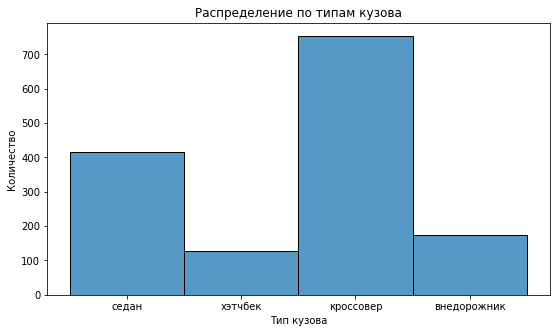

In [39]:
plt.figure(figsize = (9, 5))
sns.histplot(data =df_0, x = 'body_car', bins =10)
plt.title('Распределение по типам кузова')
plt.ylabel('Количество')
plt.xlabel('Тип кузова')

В выборке есть дисбаланс классов,кроссоверов значительно больше остальных кузовов на вторм месте седанпотом внедорожники, и на последнем месте хэтчбек

Так как наш целевой признак кузов посмотрим на данные отдельно по каждому: 

In [40]:
print('\033[1m' 'Седан')
print ('\033[0m')

Седан



In [41]:
df_0[df_0['body_car']=='седан'].describe()

,seats,doors,engine_volume,engine_power_hp,engine_torque_n.m,transmission_step,fc_city,fc_mixed,fc_track,ground_clearance_mm,length_mm,width_mm,height_mm,wheelbase_mm,trunk_volume_l,trunk_volume_max_l,ftank_volume_l,weight_kg
count,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000
mean,4.908654,4.137019,2217.918269,211.348558,323.579327,6.858173,8.438221,7.088221,4.986779,139.663462,4792.911058,1834.555288,1463.548077,2830.507212,481.656250,577.509615,62.454327,1573.975962
std,0.288448,0.344282,786.511623,108.212469,168.702543,1.659316,3.859459,1.869033,2.187036,42.933653,268.824625,76.690910,25.363337,181.055167,82.237415,309.431145,10.904750,305.940587
min,4.000000,4.000000,1332.000000,82.000000,132.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4330.000000,1690.000000,1400.000000,2480.000000,0.000000,0.000000,40.000000,1106.000000
25%,5.000000,4.000000,1598.000000,123.000000,155.000000,6.000000,7.200000,6.000000,4.700000,135.000000,4595.000000,1789.000000,1450.000000,2670.000000,460.000000,470.000000,55.000000,1325.000000
50%,5.000000,4.000000,1995.000000,190.000000,300.000000,7.000000,8.550000,6.850000,5.400000,152.000000,4855.000000,1850.000000,1465.000000,2835.000000,500.000000,502.000000,60.000000,1585.000000
75%,5.000000,4.000000,2498.000000,249.000000,401.750000,8.000000,10.200000,7.700000,6.000000,160.000000,4963.000000,1886.000000,1479.000000,2941.000000,520.000000,530.000000,70.000000,1770.000000
max,5.000000,5.000000,6592.000000,625.000000,800.000000,10.000000,18.400000,12.800000,9.600000,195.000000,5495.000000,1987.000000,1517.000000,3450.000000,625.000000,1760.000000,85.000000,2345.000000


Средние параметры: вес 1564 кг, длина 4804, ширина  1853, высота 1454,объем багажника 467, просвет 139 

In [42]:
print('\033[1m' 'Хэтчбек')
print ('\033[0m')

Хэтчбек



In [43]:
df_0[df_0['body_car']=='хэтчбек'].describe()

,seats,doors,engine_volume,engine_power_hp,engine_torque_n.m,transmission_step,fc_city,fc_mixed,fc_track,ground_clearance_mm,length_mm,width_mm,height_mm,wheelbase_mm,trunk_volume_l,trunk_volume_max_l,ftank_volume_l,weight_kg
count,128.0,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,5.0,4.984375,1806.609375,176.898438,269.234375,6.289062,8.484375,6.672656,5.396094,152.570312,4481.304688,1798.375000,1468.687500,2713.679688,428.382812,1106.742188,52.218750,1415.750000
std,0.0,0.124507,594.500362,90.304719,149.470640,1.636938,2.513223,1.558351,1.327208,32.353530,406.384976,81.079625,51.872307,167.476732,107.032420,415.043272,10.875051,304.841226
min,5.0,4.000000,0.000000,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3595.000000,1595.000000,1386.000000,2375.000000,170.000000,170.000000,0.000000,885.000000
25%,5.0,5.000000,1395.000000,113.000000,151.000000,6.000000,7.200000,5.800000,5.000000,140.000000,4240.000000,1750.000000,1422.000000,2600.000000,380.000000,1010.000000,50.000000,1187.000000
50%,5.0,5.000000,1598.000000,150.000000,250.000000,7.000000,8.500000,6.600000,5.400000,155.000000,4670.000000,1814.000000,1476.000000,2686.000000,406.000000,1147.000000,50.000000,1315.000000
75%,5.0,5.000000,1992.000000,245.000000,353.000000,7.000000,9.300000,7.100000,5.800000,161.000000,4830.000000,1870.000000,1522.000000,2905.000000,535.000000,1390.000000,60.000000,1693.000000
max,5.0,5.000000,3982.000000,639.000000,900.000000,9.000000,15.700000,11.300000,8.900000,195.000000,5091.000000,1908.000000,1598.000000,3070.000000,610.000000,1800.000000,73.000000,2025.000000


Средние параметры: вес 1415 кг, длина 4481, ширина 1798, высота 1468,объем багажника 428,просвет 152

In [44]:
print('\033[1m' 'Кроссовер')
print ('\033[0m')

Кроссовер



In [45]:
df_0[df_0['body_car']=='кроссовер'].describe()

,seats,doors,engine_volume,engine_power_hp,engine_torque_n.m,transmission_step,fc_city,fc_mixed,fc_track,ground_clearance_mm,length_mm,width_mm,height_mm,wheelbase_mm,trunk_volume_l,trunk_volume_max_l,ftank_volume_l,weight_kg
count,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000
mean,5.161804,5.201592,2080.961538,200.798408,327.960212,5.977454,8.394695,7.167374,5.589125,197.360743,4589.334218,1893.775862,1660.875332,2750.862069,531.509284,1512.371353,60.704244,1700.602122
std,0.564863,0.602516,644.635839,83.513574,146.486794,2.991492,3.532475,1.771576,2.103457,25.218827,240.503135,86.162954,83.109300,122.452667,139.589716,381.755587,11.116493,285.464456
min,5.000000,5.000000,0.000000,82.000000,118.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4140.000000,1756.000000,17.000000,2500.000000,230.000000,0.000000,0.000000,1075.000000
25%,5.000000,5.000000,1598.000000,150.000000,202.750000,6.000000,7.200000,6.200000,5.200000,185.000000,4382.000000,1822.000000,1630.000000,2670.000000,430.000000,1388.000000,54.000000,1466.750000
50%,5.000000,5.000000,1997.000000,180.000000,320.000000,6.000000,9.100000,7.300000,6.050000,203.000000,4586.000000,1859.000000,1658.000000,2700.000000,525.000000,1550.000000,60.000000,1680.000000
75%,5.000000,5.000000,1999.000000,249.000000,400.000000,8.000000,10.100000,8.000000,6.600000,211.000000,4756.500000,1984.000000,1695.000000,2864.000000,591.000000,1731.000000,67.000000,1894.750000
max,8.000000,7.000000,6417.000000,625.000000,900.000000,9.000000,20.500000,14.000000,10.100000,254.000000,5189.000000,2070.000000,1813.000000,3105.000000,1060.000000,2781.000000,99.000000,2555.000000


Средние параметры: вес 1700 кг, длина 4589, ширина 1893, высота 1660,объем багажника 531, просвет 197

In [46]:
print('\033[1m' 'Внедорожник')
print ('\033[0m')

Внедорожник



In [47]:
df_0[df_0['body_car']=='внедорожник'].describe()

,seats,doors,engine_volume,engine_power_hp,engine_torque_n.m,transmission_step,fc_city,fc_mixed,fc_track,ground_clearance_mm,length_mm,width_mm,height_mm,wheelbase_mm,trunk_volume_l,trunk_volume_max_l,ftank_volume_l,weight_kg
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,5.298851,5.649425,3469.316092,309.798851,526.367816,7.545977,8.330460,8.600000,5.262069,218.252874,4885.919540,1983.195402,1867.948276,2895.850575,630.982759,1840.735632,90.327586,2323.896552
std,0.827489,1.220288,1134.081283,103.571258,128.959429,1.023234,7.081339,3.996704,4.221723,51.316477,285.046015,92.775363,70.796563,169.605563,241.172652,520.603206,15.548605,259.078538
min,4.000000,2.000000,1462.000000,102.000000,130.000000,4.000000,0.000000,0.000000,0.000000,0.000000,3650.000000,1645.000000,1717.000000,2250.000000,85.000000,430.000000,40.000000,1090.000000
25%,5.000000,5.000000,2933.500000,249.000000,439.000000,8.000000,0.000000,7.500000,0.000000,213.000000,4805.000000,1925.750000,1805.000000,2850.000000,480.000000,1686.000000,85.000000,2230.000000
50%,5.000000,5.000000,2996.000000,272.000000,549.500000,8.000000,9.500000,8.950000,6.700000,218.000000,4879.000000,1996.000000,1868.000000,2922.000000,639.000000,1934.000000,87.000000,2341.000000
75%,5.000000,7.000000,4437.500000,367.000000,610.000000,8.000000,14.275000,11.500000,9.100000,229.500000,5000.000000,2073.000000,1921.250000,2992.500000,782.000000,1963.000000,97.000000,2490.000000
max,8.000000,8.000000,6162.000000,585.000000,850.000000,9.000000,20.600000,14.500000,11.700000,291.000000,5697.000000,2157.000000,1974.000000,3302.000000,1137.000000,3424.000000,138.000000,2817.000000


Средние параметры: вес 1700 кг, длина 4885, ширина 1983, высота 1867,объем багажника 630, просвет 218

Выводы
* В выборке есть дисбаланс классов,кроссоверов значительно больше остальных кузовов. На вторм месте седан, потом  внедорожники, и на последнем месте хэтчбек.

Средние параметры:
* Седан: вес 1564 кг/длина 4804 мм / ширина 1853 мм / высота 1454 мм / объем багажника 467 Л/ просвет 139 мм;
* Хэтчбек: вес 1415 кг/ длина 4481 / ширина 1798 / высота 1468 / объем багажника 428 / просвет 152;
* Кроссовер: вес 1700 кг / длина 4589 / ширина 1893 / высота 1660 / объем багажника 531 / просвет 197;
* Внедорожник: вес 1700 кг / длина 4885 / ширина 1983 / высота 1867 / объем багажника 630 / просвет 218;

# Выбор модели

Поготовим данные 

Закодируем порядковым кодированием целевой признак:

In [48]:
df_0['body_car_cat'] = df_0['body_car']\
            .replace(['седан','хэтчбек','кроссовер','внедорожник'],[1,2,3,4]).astype('int')

Разделим данные на целевой признак и обучающие:

In [49]:
features = df_0.drop(['body_car','body_car_cat','brand','model','complect'], axis =1)
target = df_0['body_car_cat']

Выделим тестовую и обучающую выборку:

In [50]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.2, random_state=12345)

Закодируем категориальные признаки:

In [51]:
features_train = pd.get_dummies(features_train, drop_first=True)
features_test = pd.get_dummies(features_test, drop_first=True)

Проверим размер выборок:

In [52]:
print('Размер обучающей выборки:', features_train.shape)
print('Размер валидационной выборки:', features_test.shape)

Размер обучающей выборки: (1177, 24)
Размер валидационной выборки: (295, 24)


Маштабируем признаки:

In [53]:
pd.options.mode.chained_assignment = None
numeric = ['seats', 'doors', 'engine_volume', 'engine_power_hp',
       'engine_torque_n.m', 'transmission_step', 'fc_city', 'fc_mixed',
       'fc_track', 'ground_clearance_mm', 'length_mm', 'width_mm', 'height_mm',
       'wheelbase_mm', 'trunk_volume_l', 'trunk_volume_max_l',
       'ftank_volume_l', 'weight_kg']
scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [54]:
features_train.head()

,seats,doors,engine_volume,engine_power_hp,engine_torque_n.m,transmission_step,fc_city,fc_mixed,fc_track,ground_clearance_mm,length_mm,width_mm,height_mm,wheelbase_mm,trunk_volume_l,trunk_volume_max_l,ftank_volume_l,weight_kg,engine_type_гибридный,engine_type_дизельный,engine_type_электрический,transmission_type_вариатор,transmission_type_механическая,transmission_type_роботизированная
10,-0.171189,0.102953,-0.288369,-0.210893,-0.113331,0.249672,-0.294030,-0.681982,-0.231643,-0.895015,-1.175701,-0.936131,-1.272167,-0.911063,-0.928627,-0.039720,-0.898729,-0.838922,0,0,0,0,0,1
445,-0.171189,-1.133530,-0.745211,-0.889895,-1.158759,-0.152881,0.122778,-0.278754,-0.024624,-0.448390,-0.866919,-1.508987,-0.978933,-1.144150,-0.249909,-1.295889,-0.898729,-1.356180,0,0,0,0,0,0
1188,-0.171189,0.102953,-0.737073,-0.616267,-0.605297,-0.152881,-0.269512,-0.681982,-0.231643,0.869154,-0.725952,-0.363276,0.078072,-0.671676,0.021578,0.405032,-0.700935,-0.636868,0,0,0,0,0,0
888,-0.171189,0.102953,-0.270932,-0.312236,0.563123,0.652225,-0.539212,-0.816392,-0.190239,0.735167,0.468903,1.590571,0.357667,0.581955,0.279491,0.827716,-0.239415,0.343768,0,1,0,0,0,0
431,-0.171189,0.102953,0.147549,-0.231161,-0.599148,-0.152881,1.029950,0.930931,0.803450,-0.091090,0.408489,0.240269,0.494055,-0.104707,0.367724,0.781883,0.222106,0.117467,0,0,0,0,0,0


# Обучение и выбор модели

Напишем функцию что бы выводить метрики и матрицу ошибок моделей:

In [55]:
def metrics(model):
    pred = model.predict(features_test)
    print('Accuracy:', round(model.score(features_test, target_test), 3))
    print('Полнота' , round(recall_score(target_test, pred, average='weighted'),3))
    print('Точность', round(precision_score(target_test, pred, average='weighted'),3))
    print('F1-мера', round(f1_score(target_test, pred, average='weighted'),3))
    
    confusion_matrix(target_test, pred)
    cm = confusion_matrix(target_test, pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
    
    disp.plot()

    
    plt.show()
    
    try:
        sns.barplot(y=model\
            .feature_importances_, x=features_train.columns)
        plt.xticks(rotation=90)
    except:
        pass

Логистическая регрессия:

In [56]:
%%time
LR = LogisticRegression(random_state=12345, class_weight = 'balanced')
LR.fit(features_train, target_train)

CPU times: user 195 ms, sys: 4.34 ms, total: 200 ms
Wall time: 105 ms


LogisticRegression(class_weight='balanced', random_state=12345)

Accuracy: 0.942
Полнота 0.942
Точность 0.953
F1-мера 0.944


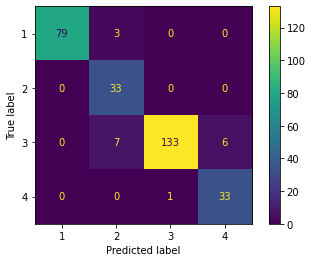

In [57]:
metrics(LR)

Линейная регресиия дала хороший результат и очень хороший по скорости обучения

Случайный лес:

In [58]:
%%time
RF = RandomForestClassifier(random_state=12345)
RF.fit(features_train, target_train)

CPU times: user 262 ms, sys: 3.72 ms, total: 266 ms
Wall time: 263 ms


RandomForestClassifier(random_state=12345)

Accuracy: 1.0
Полнота 1.0
Точность 1.0
F1-мера 1.0


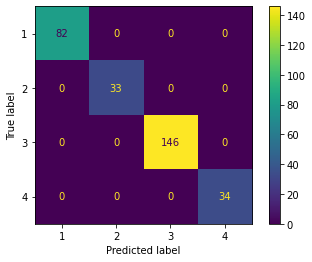

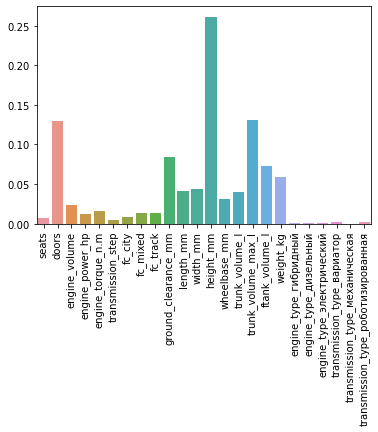

In [59]:
metrics(RF)

Случайный лес, дал отличный результат, скорость обучения можно улучшить убрав слабо влияющие фичи - тип коробки и тип двигателя

CatBoost:

In [60]:
%%time
CAT = CatBoostClassifier(iterations=5) 
CAT.fit(features_train, target_train) 

Learning rate set to 0.5
0:	learn: 0.5260901	total: 56.9ms	remaining: 228ms
1:	learn: 0.3610193	total: 66.8ms	remaining: 100ms
2:	learn: 0.2423434	total: 75.3ms	remaining: 50.2ms
3:	learn: 0.1801364	total: 84.9ms	remaining: 21.2ms
4:	learn: 0.1342467	total: 94.3ms	remaining: 0us
CPU times: user 170 ms, sys: 44.7 ms, total: 215 ms
Wall time: 430 ms


Accuracy: 0.976
Полнота 0.976
Точность 0.978
F1-мера 0.977


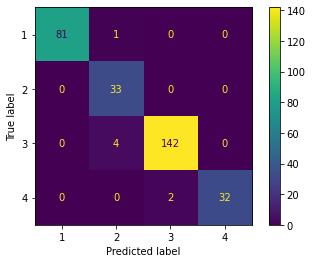

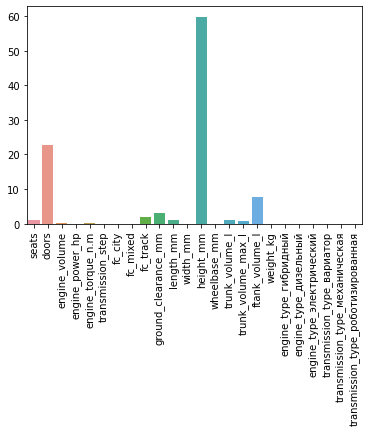

In [61]:
metrics(CAT)

Catboost - справился и его результат можно улучшить, подобором гиперпараметров по сетке и удалением лишних фичей, но с учетом того что это займет дополнительное время на обучение я не вижу в этом смысла.

# Выводы

 * В выборке есть дисбаланс классов,кроссоверов значительно больше остальных кузовов. На вторм месте седан, потом внедорожники, и на последнем месте хэтчбек.
 
* 232 модели авто из 1703 не вошли в 4 категории кузова их можно отнести к другим.

* Средние параметры:

  Седан: вес 1564 кг/длина 4804 мм / ширина 1853 мм / высота 1454 мм / объем багажника 467 Л/ просвет 139 мм;
  
  Хэтчбек: вес 1415 кг/ длина 4481 / ширина 1798 / высота 1468 / объем багажника 428 / просвет 152;
  
  Кроссовер: вес 1700 кг / длина 4589 / ширина 1893 / высота 1660 / объем багажника 531 / просвет 197;
  
  Внедорожник: вес 1700 кг / длина 4885 / ширина 1983 / высота 1867 / объем багажника 630 / просвет 218;
  

* Лучше всех с задачей справилась класическая модель случайного леса, так же по скорости обучения она на втором месте после логистической регресии.


* Качество оценки модели оценивал по матрице ошибок.


* основываясь на графике важности фичей, в основные параметры влияющие на тип кузова, количество дверей и высота авто.